Shape of the dataset: (271287, 31)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271287 entries, 0 to 271286
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    271287 non-null  float64
 1   V1      271287 non-null  float64
 2   V2      271287 non-null  float64
 3   V3      271287 non-null  float64
 4   V4      271287 non-null  float64
 5   V5      271287 non-null  float64
 6   V6      271287 non-null  float64
 7   V7      271287 non-null  float64
 8   V8      271287 non-null  float64
 9   V9      271286 non-null  float64
 10  V10     271286 non-null  float64
 11  V11     271286 non-null  float64
 12  V12     271286 non-null  float64
 13  V13     271286 non-null  float64
 14  V14     271286 non-null  float64
 15  V15     271286 non-null  float64
 16  V16     271286 non-null  float64
 17  V17     271286 non-null  float64
 18  V18     271286 non-null  float64
 19  V19     271286 non-null  float64
 2

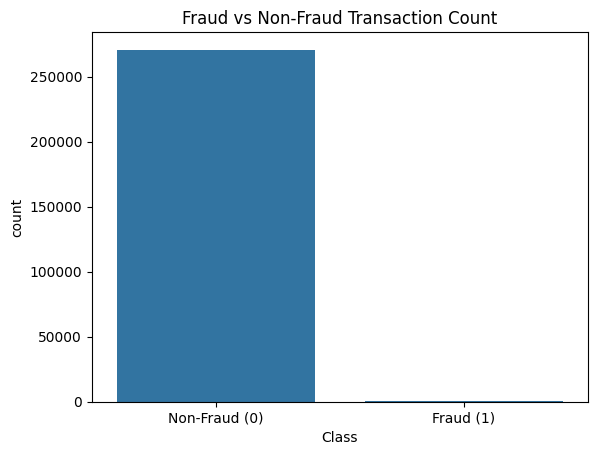

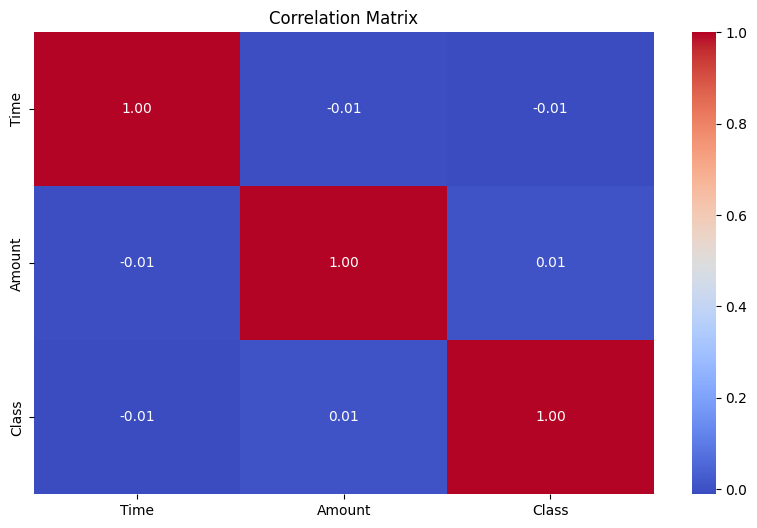


Number of duplicate rows: 1017


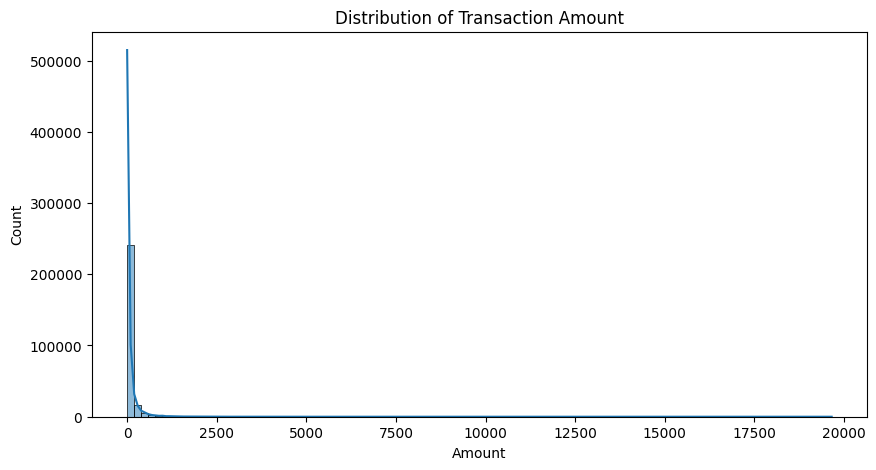


Cleaned dataset shape: (270270, 31)


In [1]:
# Step 0: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv("creditcard.csv")
# Step 2: Overview of the dataset
print("Shape of the dataset:", df.shape)
print("\nDataset Info:\n")
print(df.info())

# Step 3: Display first few rows
print("\nFirst 5 rows:\n", df.head())

# Step 4: Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Step 5: Summary statistics
print("\nSummary statistics:\n", df.describe())

# Step 6: Check class distribution (Imbalance analysis)
print("\nClass distribution:\n", df['Class'].value_counts())

# Visualize class imbalance
sns.countplot(x='Class', data=df)
plt.title('Fraud vs Non-Fraud Transaction Count')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

# Step 7: Correlation matrix (limited to Amount, Time, Class for visibility)
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Time', 'Amount', 'Class']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Step 8: Check for duplicate records
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Optional: Drop duplicates
df = df.drop_duplicates()

# Step 9: Check distribution of 'Amount' feature
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.show()

# Step 10: Scaling 'Amount' and 'Time' (optional for preprocessing step)
from sklearn.preprocessing import StandardScaler

df['scaled_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

# Drop original Time and Amount (optional)
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Final dataset check
print("\nCleaned dataset shape:", df.shape)
